# Geoid Anomaly Grid
**Description:**  Gridded geoid heights from EIGEN-6C4 originally at a 10 arc-min resolution. Can be added to a ellipsoid-referenced elevation grid to convert it to be referenced to the geoid. 

**Dataset:** 

Uieda, Leonardo. “Fatiando a Terra Data: Earth - Geoid Height Grid at 10 Arc-Minute Resolution.” Zenodo, January 20, 2022. https://doi.org/10.5281/zenodo.5882205.

**Associated paper:** 

Förste, Christoph, Sean.L. Bruinsma, Oleg Abrikosov, Jean-Michel Lemoine, Jean Charles Marty, Frank Flechtner, G. Balmino, F. Barthelmes, and R. Biancale. “EIGEN-6C4 The Latest Combined Global Gravity Field Model Including GOCE Data up to Degree and Order 2190 of GFZ Potsdam and GRGS Toulouse.” Application/octet-stream,application/octet-stream,application/zip. GFZ Data Services, 2014. https://doi.org/10.5880/ICGEM.2015.1.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [2]:
data = fetch.geoid(
    hemisphere="north"
    # available options
    # region,
    # spacing,
    # registration ("g" for gridline or "p" for pixel),
)
data

<xarray.DataArray 'z' (y: 1401, x: 1401)> Size: 16MB
array([[-30.31243706, -30.33487129, -30.37892342, ...,  48.041008  ,
         48.02936554,  48.0265274 ],
       [-30.29789162, -30.30325317, -30.33566093, ...,  48.00796509,
         47.99909592,  48.00268555],
       [-30.33016205, -30.32653046, -30.34380722, ...,  47.99285126,
         47.98831558,  47.99351501],
       ...,
       [ -3.24265838,  -3.20760894,  -3.15446568, ..., -51.43643188,
        -51.65333939, -51.86560059],
       [ -3.31388164,  -3.27489042,  -3.23152637, ..., -51.45676804,
        -51.67767715, -51.89131546],
       [ -3.38364506,  -3.3380127 ,  -3.29133773, ..., -51.47672653,
        -51.69813156, -51.91356659]])
Coordinates:
  * y        (y) float64 11kB -3.5e+06 -3.495e+06 ... 3.495e+06 3.5e+06
  * x        (x) float64 11kB -3.5e+06 -3.495e+06 ... 3.495e+06 3.5e+06
Attributes:
    Conventions:   CF-1.7
    title:         
    history:       gmt grdsample @GMTAPI@-S-I-G-M-G-N-000000 -G@GMTAPI@-S-O-G...
    description:   
    long_name:     z
    actual_range:  [-52.08284378  68.41519928]

In [3]:
_ = utils.get_grid_info(data, print_info=True)

grid spacing: 5000.0 m
grid region: (-3500000.0, 3500000.0, -3500000.0, 3500000.0)
grid zmin: -52.0828437805
grid zmax: 68.4151992798
grid registration: g


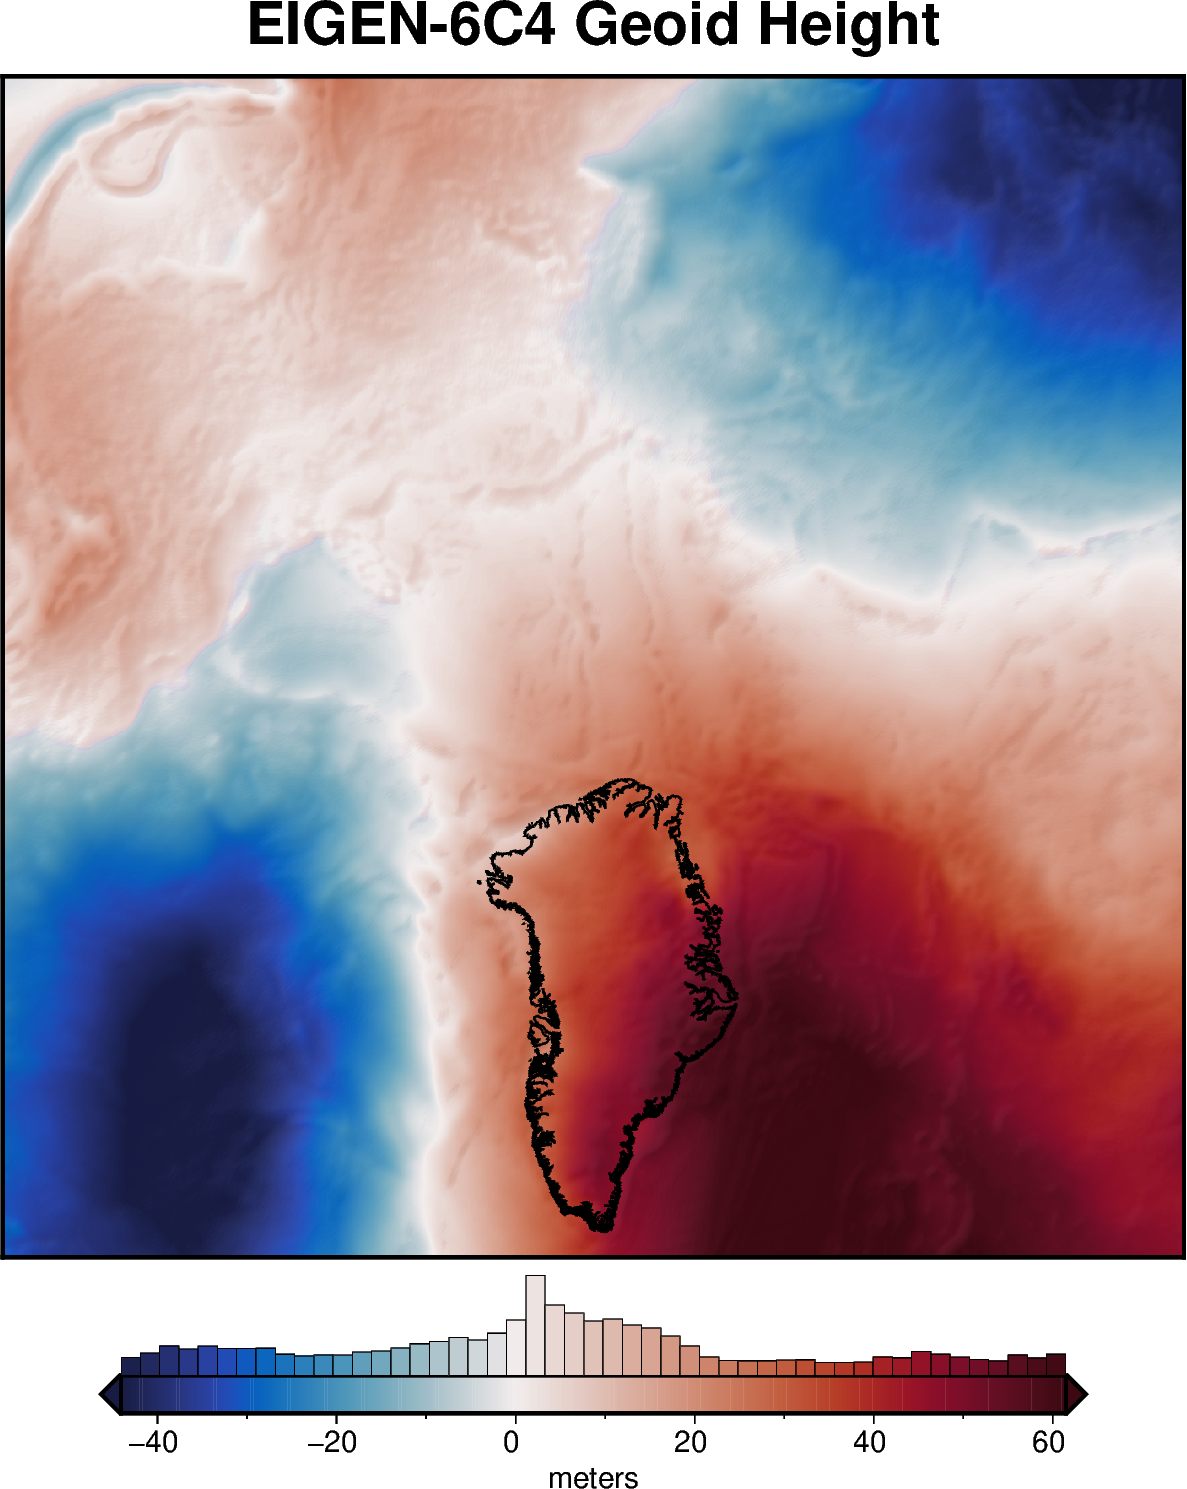

In [4]:
fig = maps.plot_grd(
    data,
    title="EIGEN-6C4 Geoid Height",
    cmap="balance+h0",
    coast=True,
    cbar_label="meters",
    hist=True,
    robust=True,
    hemisphere="north",
    shading="+nt.1",
)

fig.show(dpi=200)